In [1]:
%load_ext autoreload
%autoreload 2
from htmd import *
htmd.config(viewer='webgl')
%pylab inline


Please cite -- HTMD: High-Throughput Molecular Dynamics for Molecular Discovery
J. Chem. Theory Comput., 2016, 12 (4), pp 1845-1852. 
http://pubs.acs.org/doi/abs/10.1021/acs.jctc.6b00049

You are on the latest HTMD version (unpackaged : /shared/sdoerr/Work/htmdacellera/htmd).

Populating the interactive namespace from numpy and matplotlib


/shared/sdoerr/Software/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Projecting simulations

* Projecting single Molecule objects
* Projecting lists of simulations

## Projecting single Molecule objects

In [2]:
mol = Molecule('ntl9_structure.pdb')
mol.read('ntl9_trajectory.xtc')
mol.filter('protein')
mol.view()

2016-11-04 14:19:41,855 - htmd.molecule.molecule - INFO - Removed 17 atoms. 631 atoms remaining in the molecule.


In [3]:
crystal = Molecule('ntl9_crystal.pdb')
crystal.view()

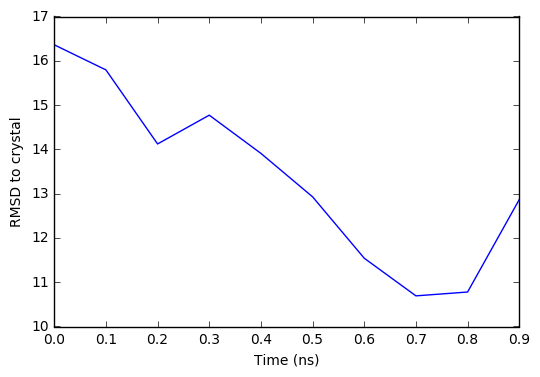

In [17]:
metr = MetricRmsd(crystal, 'protein and name CA')
proj = metr.project(mol)

plt.plot(mol.fstep*np.arange(len(proj)), proj)
_ = plt.xlabel('Time (ns)')
_ = plt.ylabel('RMSD to crystal')

## Projecting a simlist

In [5]:
sims = simlist(glob('datasets/1/filtered/*/'), 'datasets/1/filtered/filtered.pdb')
metr = Metric(sims)
metr.set(MetricDistance('protein and name CA', 'resname MOL and noh', metric='contacts'))
data = metr.project()
data.fstep = 0.1

Creating simlist: 100% (314/314) [#################################] eta 00:01 \
Projecting trajectories: 100% (313/313) [##########################] eta 00:00 /


2016-11-04 14:20:20,574 - htmd.projections.metric - INFO - Frame step 1e-06ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.


## Working with data maps

In [6]:
print(data.dat[14].shape)

(200, 2493)


* Each row is a frame of simulation 14
* So what does each collumn correspond to?

Get mapping from:
* Either data.map (if we used `simlists`)
* Or from the projection class directly

In [7]:
data.map.head()

,atomIndexes,description,type
0,"[4, 4480]",contact between GLU 1 CA and MOL 278 C3,contact
1,"[19, 4480]",contact between ALA 2 CA and MOL 278 C3,contact
2,"[29, 4480]",contact between ASP 3 CA and MOL 278 C3,contact
3,"[41, 4480]",contact between CYX 4 CA and MOL 278 C3,contact
4,"[51, 4480]",contact between GLY 5 CA and MOL 278 C3,contact


In [8]:
mapping = MetricSelfDistance('protein and name CA').getMapping(mol)
mapping.head()

,atomIndexes,description,type
0,"[8, 25]",distance between MET 1 CA and LYS 2 CA,distance
1,"[8, 47]",distance between MET 1 CA and VAL 3 CA,distance
2,"[8, 63]",distance between MET 1 CA and ILE 4 CA,distance
3,"[8, 82]",distance between MET 1 CA and PHE 5 CA,distance
4,"[8, 102]",distance between MET 1 CA and LEU 6 CA,distance


## Indexing pandas DataFrames

In [19]:
data.map.iloc[20:22]  # i(nteger)loc(ation)

,atomIndexes,description,type
20,"[321, 4480]",contact between ARG 21 CA and MOL 278 C3,contact
21,"[345, 4480]",contact between GLU 22 CA and MOL 278 C3,contact


In [10]:
data.map.loc[20]   # Using the DataFrame index

atomIndexes                                 [321, 4480]
description    contact between ARG 21 CA and MOL 278 C3
type                                            contact
Name: 20, dtype: object

In [11]:
data.map['description'][20]

'contact between ARG 21 CA and MOL 278 C3'